In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [34]:
import numpy as np 
import cv2
import os
import random
import matplotlib.pyplot as plt 
import pickle
from multiprocessing import Pool, Manager, cpu_count, Lock
import pickle
import keras 
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation,Dropout
import keras.losses
import time
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from keras.layers import Conv2D,MaxPool2D,GlobalAveragePooling2D,AveragePooling2D, Dense

In [35]:
!nvidia-smi

Sun Oct  3 13:23:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    31W /  70W |  14586MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [36]:
 from keras_preprocessing.image import ImageDataGenerator

In [37]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [38]:
train_generator = train_datagen.flow_from_directory(directory="/content/drive/MyDrive/Miczone/fingerprint/data/train",target_size=(224,224),batch_size=32)

Found 25331 images belonging to 7 classes.


In [39]:
val_generator = val_datagen.flow_from_directory(directory="/content/drive/MyDrive/Miczone/fingerprint/data/val",target_size=(224,224),batch_size=32)

Found 5844 images belonging to 7 classes.


In [40]:
for data_batch,label_batch in train_generator:
  print(data_batch.shape)
  print(label_batch.shape)
  break

(32, 224, 224, 3)
(32, 7)


In [54]:
model = Sequential()
width = 224
height = 224
classes = 7

In [55]:
shape = (width, height, 3)

In [56]:
model.add(Conv2D(16, (3, 3), padding="same", input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(258))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(classes))
model.add(Activation("softmax"))

In [57]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
activation_94 (Activation)   (None, 224, 224, 16)      0         
_________________________________________________________________
batch_normalization_72 (Batc (None, 224, 224, 16)      64        
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 224, 224, 16)      2320      
_________________________________________________________________
activation_95 (Activation)   (None, 224, 224, 16)      0         
_________________________________________________________________
batch_normalization_73 (Batc (None, 224, 224, 16)      64        
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 112, 112, 16)     

In [58]:
 model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [59]:
 history = model .fit(train_generator,epochs=15, validation_data = val_generator,batch_size=32,verbose = 1)

Epoch 1/15
792/792 [==============================] - 113s 141ms/step - loss: 1.5918 - accuracy: 0.4271 - val_loss: 1.4906 - val_accuracy: 0.4528
Epoch 2/15
792/792 [==============================] - 111s 140ms/step - loss: 1.2061 - accuracy: 0.5447 - val_loss: 1.0229 - val_accuracy: 0.6064
Epoch 3/15
792/792 [==============================] - 110s 139ms/step - loss: 0.9128 - accuracy: 0.6507 - val_loss: 0.7977 - val_accuracy: 0.6956
Epoch 4/15
792/792 [==============================] - 110s 139ms/step - loss: 0.7756 - accuracy: 0.7022 - val_loss: 0.7699 - val_accuracy: 0.7088
Epoch 5/15
792/792 [==============================] - 111s 140ms/step - loss: 0.7083 - accuracy: 0.7343 - val_loss: 0.7586 - val_accuracy: 0.7120
Epoch 6/15
792/792 [==============================] - 112s 141ms/step - loss: 0.6494 - accuracy: 0.7580 - val_loss: 0.6896 - val_accuracy: 0.7503
Epoch 7/15
792/792 [==============================] - 111s 140ms/step - loss: 0.6044 - accuracy: 0.7736 - val_loss: 0.6105 -

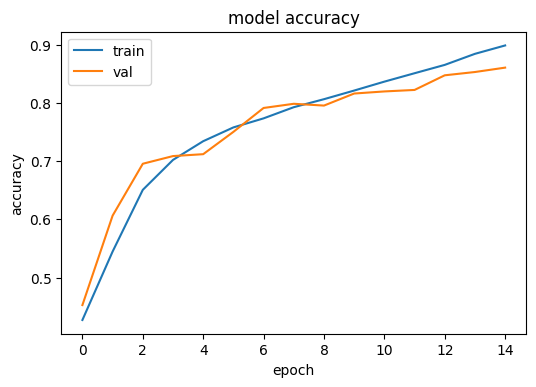

In [60]:
plt.figure(figsize = (6,4),dpi=100)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize = (6,4),dpi=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [61]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [62]:
test_generator = test_datagen.flow_from_directory(directory="/content/drive/MyDrive/Miczone/fingerprint/data/test",target_size=(224,224),batch_size=7795,class_mode="sparse")

Found 7795 images belonging to 7 classes.


In [63]:
for Xtest,Ytest in test_generator:
  X_test = Xtest
  Y_test = Ytest
  break

In [64]:
pred = model.predict(X_test)
pred_idx = np.argmax(pred, axis=1)

In [65]:
print(classification_report(Y_test, pred_idx))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       695
         1.0       0.98      0.34      0.51       129
         2.0       0.93      0.97      0.95      3582
         3.0       0.79      0.69      0.74      1297
         4.0       0.71      0.80      0.75      1316
         5.0       0.86      0.39      0.54        76
         6.0       0.70      0.68      0.69       700

    accuracy                           0.85      7795
   macro avg       0.85      0.69      0.73      7795
weighted avg       0.85      0.85      0.85      7795



In [ ]:
model.evaluate(X_test, Y_test)

In [67]:
import pandas as pd
import seaborn as sns
cm = confusion_matrix(Y_test,pred_idx)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, index=['ARCH', 'RL','UL','WCDI','WE',"WPL","WST"], columns=['ARCH', 'RL','UL','WCDI','WE',"WPL","WST"])
plt.figure(figsize = (8,4.5),dpi=100)
sns.heatmap(df_cm, cmap="Blues", annot=True,fmt='.2%')
plt.show()